In [1]:
import pymc
import numpy as np
import pandas as pd

In [2]:
bills = pd.read_csv("BillsMXc.csv").sort_values("Year", axis=0)

In [3]:
%matplotlib inline
# alpha = pymc.Normal("alpha", mu=0, tau=0.001)
beta1 = pymc.Normal("beta_1", mu=0, tau=0.001)
beta2 = pymc.Normal("beta_2", mu=0, tau=0.001)
beta3 = pymc.Normal("beta_3", mu=0, tau=0.001)
beta4 = pymc.Normal("beta_4", mu=0, tau=0.001)
beta5 = pymc.Normal("beta_5", mu=0, tau=0.001)
x1 = bills.x20
x2 = bills.x50
x3 = bills.x100 
x4 = bills.x200
x5 = bills.x500

@pymc.deterministic
def θ(β1=beta1, β2=beta2, β3=beta3, β4=beta4, β5=beta5):
    """η = β_1 + β_2*x2 + β_3*x3 + β_4*x4 + β_5*x5 """
    #x1 = bills.x20, x2 = bills.x50, x3 = bills.x100, x4 = bills.x200, x5 = bills.x500
    η = pymc.invlogit(β1 + β2*x2 + β3*x3 + β4*x4 + β5*x5)
    return np.exp(η)/(np.exp(η)+1)

y = pymc.Binomial("y", n = bills.C, p=θ, value=bills.Y, observed=True)
mymodel = pymc.Model([beta1, beta2, beta3, beta4, beta5, y])
S = pymc.MCMC(mymodel)
S.sample(iter=5000, burn=1000, thin=2, )

 [-----------------100%-----------------] 5000 of 5000 complete in 22.1 sec

Plotting beta_3
Plotting beta_4
Plotting beta_2
Plotting beta_5
Plotting beta_1


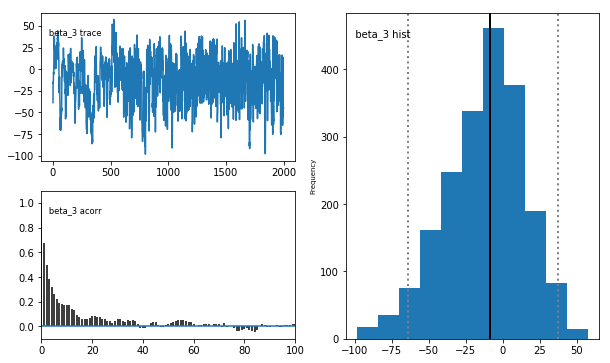

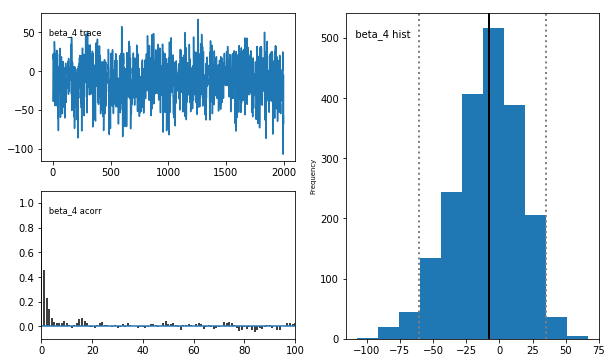

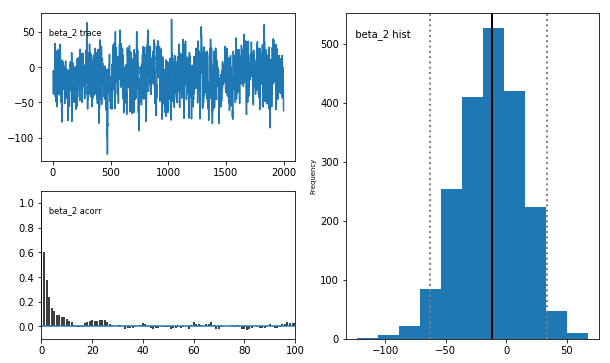

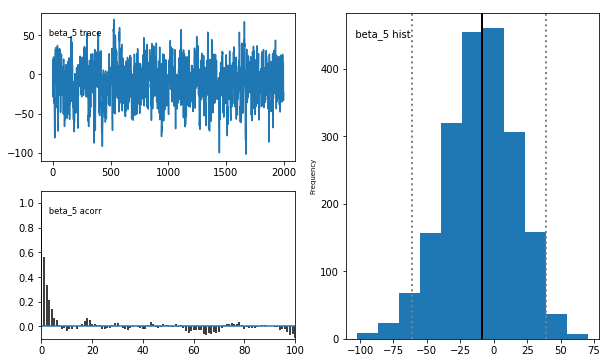

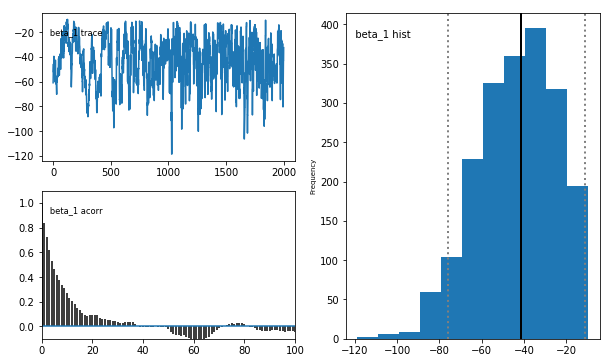

In [4]:
pymc.Matplot.plot(S)
None

In [5]:
S.DIC

306720.3865656004

In [6]:
import pymc3
import numpy as np
import pandas as pd
import theano.tensor as tt
import theano
from scipy import stats

/opt/intel/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
bills = pd.read_csv("BillsMXc.csv").sort_values("Year", axis=0)

In [22]:
with pymc3.Model() as model:
    beta = pymc3.Normal("beta", mu=0.0, tau=0.0001, shape=5)
    # mu=0.0, tau=0.0001,
#     eta = pymc3.Deterministic("eta",
#                               pymc3.math.invlogit(beta[0] + beta[1]*bills.x50.values + beta[2]*bills.x100.values +
#                              beta[3]*bills.x200.values + beta[4]*bills.x500.values))
    p = pymc3.Deterministic("p", 
                            pymc3.invlogit(beta[0] + beta[1]*bills.x50.values + beta[2]*bills.x100.values +
                                                  beta[3]*bills.x200.values + beta[4]*bills.x500.values))
    yf = pymc3.Binomial("yf", p=p, n=bills.C.values, observed=bills.Y.values)
    step = pymc3.NUTS([beta, p, yf])
#     step = pymc3.HamiltonianMC([beta, p, yf])
    trace = pymc3.sample(draws=1000, chains=4, step=step, njobs=12, cores=4)
pymc3.summary(trace, varnames=["beta"]).round(4)

Multiprocess sampling (4 chains in 12 jobs)
NUTS: [beta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:05<00:00, 1053.25draws/s]
The acceptance probability does not match the target. It is 0.8913079263379409, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8895607278964965, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta__0,-6.2382,0.1255,0.0053,-6.4959,-6.0015,576.6654,1.0032
beta__1,2.9933,0.1285,0.0053,2.7387,3.2457,601.3291,1.0031
beta__2,2.5238,0.1283,0.0053,2.2781,2.7811,611.8151,1.0031
beta__3,2.1611,0.1287,0.0054,1.9100,2.4119,579.3064,1.0033
beta__4,2.0034,0.1310,0.0054,1.7449,2.2544,611.9453,1.0028


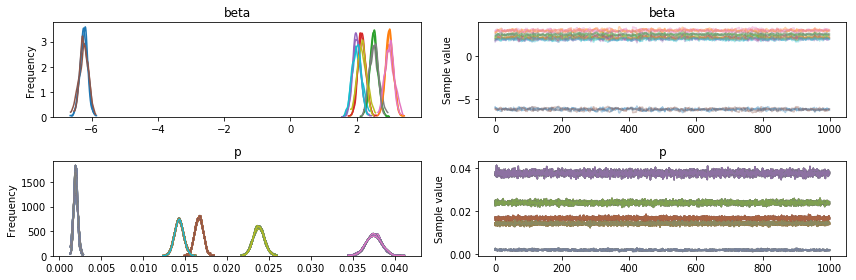

In [23]:
%matplotlib inline
pymc3.plots.traceplot(trace)
None

In [26]:
with pymc3.Model() as model2:
    alpha = pymc3.Normal("alpha", mu=0.0, tau=0.001)
    beta = pymc3.Normal("beta", mu=0.0, tau=0.001, shape=5)
    # mu=0.0, tau=0.0001,
#     eta = ((alpha + beta[0]*bills.x20.values + beta[1]*bills.x50.values + beta[2]*bills.x100.values +
#                                                   beta[3]*bills.x200.values + beta[4]*bills.x500.values))
#     p = pymc3.Deterministic("p", 
#                             pymc3.math.exp(eta)/(1+pymc3.math.exp(eta)))
    p = pymc3.Deterministic("p", pymc3.invlogit(alpha + beta[0]*bills.x20.values + beta[1]*bills.x50.values + beta[2]*bills.x100.values +
                                                beta[3]*bills.x200.values + beta[4]*bills.x500.values))
    yi = pymc3.Binomial("yi", p=p, n=bills.C.values, observed=bills.Y.values)
    yf = pymc3.Binomial("yf", p=p, n=bills.C.values, observed=bills.Y.values)
    step = pymc3.Metropolis([alpha, beta, p, yi, yf])
    trace2 = pymc3.sample(draws=3000, tune=50000, chains=2, njobs=12, cores=4, step=step, thin=1)
pymc3.summary(trace2, varnames=["alpha", "beta"]).round(4)

Multiprocess sampling (2 chains in 12 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
Sampling 2 chains: 100%|██████████| 106000/106000 [00:38<00:00, 2719.34draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,-3.9744,1.0856,0.1085,-5.1735,-2.7747,1.0034,20.0422
beta__0,-2.2735,1.0845,0.1084,-3.5183,-1.0108,1.0057,14.9582
beta__1,0.7298,1.0861,0.1086,-0.4764,1.9253,1.0034,19.8252
beta__2,0.2602,1.0848,0.1085,-0.9479,1.4632,1.0037,19.2982
beta__3,-0.1027,1.0837,0.1083,-1.3073,1.0953,1.0036,19.5349
beta__4,-0.2604,1.0876,0.1087,-1.4706,0.9482,1.0037,19.3919


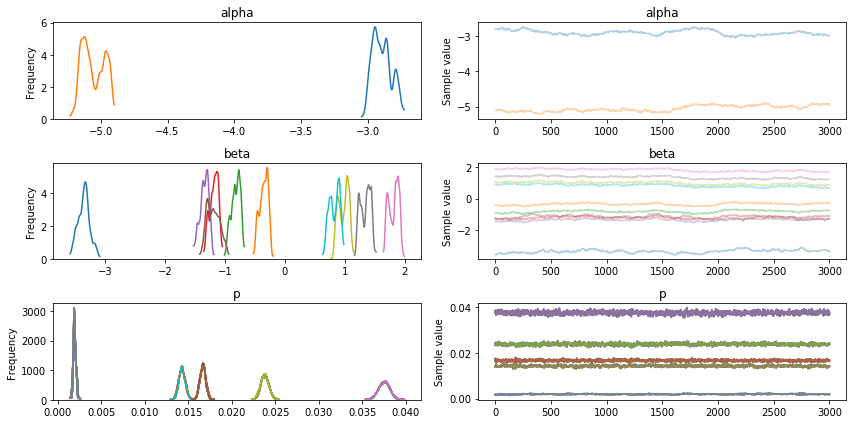

In [27]:
%matplotlib inline
pymc3.plots.traceplot(trace2)
None

In [24]:
print("Modelo sin alpha:")
pymc3.waic(trace, model)

Modelo sin alpha:


/home/jaa6766/.local/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=1372.994041313197, WAIC_se=259.4029881958137, p_WAIC=75.02275008388253, var_warn=1)

In [25]:
print("Modelo con alpha:") 
pymc3.waic(trace2, model2)

Modelo con alpha:


/home/jaa6766/.local/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=2654.330843998716, WAIC_se=352.6452173752184, p_WAIC=72.49829809782331, var_warn=1)